In [1]:
import numpy as np
import pandas as pd
import sqlite3
import os
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
v13_path = '/Users/yoachim/runs13/'
v13_dirs = ['baseline/baseline_2snap_v1.3_10yrs',
            #'baseline/baseline_nomix_v1.3_10yrs',
            'baseline/baseline_v1.3_10yrs',
           'wfd_depth/wfd_95_v1.3_10yrs',
           'wfd_depth/wfd_90_v1.3_10yrs',
           'wfd_depth/wfd_85_v1.3_10yrs',
           'wfd_depth/wfd_80_v1.3_10yrs',
           'wfd_depth/wfd_75_v1.3_10yrs',
           'wfd_depth/wfd_70_v1.3_10yrs',
           'wfd_depth/wfd_65_v1.3_10yrs',
           'rolling_cadence/delayedrolling_mod2_sdf_0.10_v1.3_10yrs']

dirs = [os.path.join(v13_path, filename) for filename in v13_dirs]
snaps = [1]*len(v13_dirs)
snaps[0] = 2
pairs = ['mixed']*len(v13_dirs)
pairs[1] = 'same'

#dirs.append('/Users/yoachim/Temp/old_runs/baseline2018a_note')
#snaps.append(2)
#pairs.append('same')

In [3]:
more_path = '/Users/yoachim/gitRepos/sims_featureScheduler_runs_1.3/wfd_only'
more_dirs = ['wfd_only_2snap_v1.3_10yrs', 'wfd_only_nomix_v1.3_10yrs', 'wfd_only_v1.3_10yrs']
snaps.extend([2,1,1])
pairs.extend(['mixed', 'same', 'mixed'])
to_add = [os.path.join(more_path, fn) for fn in more_dirs]
dirs.extend(to_add)


In [4]:
v12_path = '/Users/yoachim/gitRepos/sims_featureScheduler_runs/baselines'
v12_dirs = ['baseline_1exp_pairsame_10yrs',
           'baseline_1exp_pairsmix_10yrs',
           'baseline_2exp_pairsame_10yrs',
           'baseline_2exp_pairsmix_10yrs']

for directory in v12_dirs:
    dirs.append(os.path.join(v12_path, directory))
    
snaps.extend([1,1,2,2])
pairs.extend(['same', 'mixed', 'same', 'mixed'])

In [5]:
results = {'fONv MedianNvis':[], 'fOArea': [], 'osf':[], 'nexp':[], 'fONv MinNvis':[]}
for directory in dirs:
    conn = sqlite3.connect(os.path.join(directory, 'resultsDb_sqlite.db'))
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MedianNvis";', conn)
    results['fONv MedianNvis'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fOArea";', conn)
    results['fOArea'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=3;', conn)
    results['osf'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where metricid=5;', conn)
    results['nexp'].append(np.max(df.values))
    
    df = pd.read_sql('select summaryValue from summarystats where summaryName="fONv MinNvis";', conn)
    results['fONv MinNvis'].append(np.max(df.values))
    
    conn.close()

In [6]:
keys = list(results.keys())
header = '| Run Name  |    '
for key in keys:
    header+= '%s |' % key

header += 'snaps |'
header += 'pairs |'
print(header)
print('| -- | -- | -- | -- | --| --| --|--|')
for i in range(len(dirs)):
    rn = os.path.basename(dirs[i])
    out = '| '
    out += rn +' |'
    for key in keys:
        out +='   %.3f  |' % results[key][i]
    out += '  %i |' % snaps[i]
    out += '  %s |' % pairs[i]
    print(out)
    

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| baseline_2snap_v1.3_10yrs |   829.000  |   10232.668  |   0.703  |   2019468.000  |   767.000  |  2 |  mixed |
| baseline_v1.3_10yrs |   929.000  |   18155.600  |   0.760  |   2183599.000  |   862.000  |  1 |  same |
| wfd_95_v1.3_10yrs |   1039.000  |   18391.442  |   0.762  |   2188929.000  |   969.000  |  1 |  mixed |
| wfd_90_v1.3_10yrs |   1002.000  |   18297.441  |   0.762  |   2190125.000  |   932.000  |  1 |  mixed |
| wfd_85_v1.3_10yrs |   963.000  |   18240.369  |   0.762  |   2190583.000  |   895.000  |  1 |  mixed |
| wfd_80_v1.3_10yrs |   922.000  |   18202.601  |   0.762  |   2191506.000  |   857.000  |  1 |  mixed |
| wfd_75_v1.3_10yrs |   884.000  |   18107.760  |   0.763  |   2192342.000  |   829.000  |  1 |  mixed |
| wfd_70_v1.3_10yrs |   851.000  |   15951.615  |   0.764  |   2194175.000  |   814.000  |  1 |  mixed |
| wfd_65_v1.3_10yrs |   830.00

| Run Name  |    fONv MedianNvis |fOArea |osf |nexp |fONv MinNvis |snaps |pairs |
| -- | -- | -- | -- | --| --| --|--|
| baseline_2snap_v1.3_10yrs |   829.000  |   10232.668  |   0.703  |   2019468.000  |   767.000  |  2 |  mixed |
| baseline_v1.3_10yrs |   929.000  |   18155.600  |   0.760  |   2183599.000  |   862.000  |  1 |  same |
| wfd_95_v1.3_10yrs |   1039.000  |   18391.442  |   0.762  |   2188929.000  |   969.000  |  1 |  mixed |
| wfd_90_v1.3_10yrs |   1002.000  |   18297.441  |   0.762  |   2190125.000  |   932.000  |  1 |  mixed |
| wfd_85_v1.3_10yrs |   963.000  |   18240.369  |   0.762  |   2190583.000  |   895.000  |  1 |  mixed |
| wfd_80_v1.3_10yrs |   922.000  |   18202.601  |   0.762  |   2191506.000  |   857.000  |  1 |  mixed |
| wfd_75_v1.3_10yrs |   884.000  |   18107.760  |   0.763  |   2192342.000  |   829.000  |  1 |  mixed |
| wfd_70_v1.3_10yrs |   851.000  |   15951.615  |   0.764  |   2194175.000  |   814.000  |  1 |  mixed |
| wfd_65_v1.3_10yrs |   830.000  |   10439.134  |   0.763  |   2193981.000  |   794.000  |  1 |  mixed |
| delayedrolling_mod2_sdf_0.10_v1.3_10yrs |   879.000  |   16095.134  |   0.763  |   2191312.000  |   787.000  |  1 |  mixed |
| wfd_only_2snap_v1.3_10yrs |   1034.000  |   18330.173  |   0.707  |   2030265.000  |   965.000  |  2 |  mixed |
| wfd_only_nomix_v1.3_10yrs |   1148.000  |   18513.979  |   0.784  |   2251985.000  |   1069.000  |  1 |  same |
| wfd_only_v1.3_10yrs |   1118.000  |   18505.586  |   0.764  |   2195413.000  |   1044.000  |  1 |  mixed |
| baseline_1exp_pairsame_10yrs |   986.000  |   18226.940  |   0.785  |   2263993.000  |   914.000  |  1 |  same |
| baseline_1exp_pairsmix_10yrs |   963.000  |   18186.654  |   0.768  |   2216026.000  |   895.000  |  1 |  mixed |
| baseline_2exp_pairsame_10yrs |   907.000  |   18096.850  |   0.725  |   2092909.000  |   839.000  |  2 |  same |
| baseline_2exp_pairsmix_10yrs |   887.000  |   17942.420  |   0.710  |   2048865.000  |   821.000  |  2 |  mixed |



In [7]:
# OK, let's package this shit up as a giant dataframe
array_list = []

names = keys.copy()
names.extend(['Run Name', 'snaps', 'pairs'])
types = [float]*len(keys)
types.extend(['|U40', int, '|U10'])

dt = list(zip(names, types))

for i in range(len(dirs)):
    arr = np.zeros(1, dtype=dt)
    arr['Run Name'] = os.path.basename(dirs[i])
    arr['snaps'] = snaps[i]
    arr['pairs'] = pairs[i]
    for key in keys:
        arr[key] =results[key][i]
    array_list.append(arr) 


In [8]:
data_array = np.concatenate(array_list)
data_array

array([ (  829.,  10232.66812241,  0.70277847,  2019468.,   767., 'baseline_2snap_v1.3_10yrs', 2, 'mixed'),
       (  929.,  18155.60013321,  0.75986853,  2183599.,   862., 'baseline_v1.3_10yrs', 1, 'same'),
       ( 1039.,  18391.44164751,  0.76171699,  2188929.,   969., 'wfd_95_v1.3_10yrs', 1, 'mixed'),
       ( 1002.,  18297.44075925,  0.76212519,  2190125.,   932., 'wfd_90_v1.3_10yrs', 1, 'mixed'),
       (  963.,  18240.36879137,  0.76226757,  2190583.,   895., 'wfd_85_v1.3_10yrs', 1, 'mixed'),
       (  922.,  18202.60057734,  0.76249794,  2191506.,   857., 'wfd_80_v1.3_10yrs', 1, 'mixed'),
       (  884.,  18107.76039543,  0.76291163,  2192342.,   829., 'wfd_75_v1.3_10yrs', 1, 'mixed'),
       (  851.,  15951.61502088,  0.76354758,  2194175.,   814., 'wfd_70_v1.3_10yrs', 1, 'mixed'),
       (  830.,  10439.13435914,  0.76348808,  2193981.,   794., 'wfd_65_v1.3_10yrs', 1, 'mixed'),
       (  879.,  16095.13423421,  0.76254493,  2191312.,   787., 'delayedrolling_mod2_sdf_0.10_v1.3

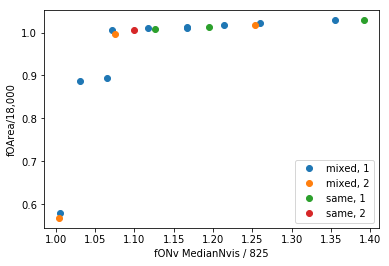

In [9]:
filters = ['mixed', 'same']
snaps = [1,2]

for filt in filters:
    for snap in snaps:
        good = np.where((data_array['snaps'] == snap) & (data_array['pairs'] == filt) )
        plt.plot(data_array['fONv MedianNvis'][good]/825., data_array['fOArea'][good]/18000, 'o', label=filt+', %i' % snap)
plt.xlabel('fONv MedianNvis / 825')
plt.ylabel('fOArea/18,000')
plt.legend()

In [10]:
df = pd.DataFrame(data_array)
df['nexp'] = np.round(df['nexp']/1e6*100)/100
df['fONv MedianNvis'] = np.round(df['fONv MedianNvis']/825*100)/100
df['fOArea'] = np.round(df['fOArea']/18000*100)/100
df['fONv MinNvis'] = np.round(df['fONv MinNvis']/825*100)/100


In [11]:
latex_table = df.to_latex(index=False, #float_format="%%.1f",
                          columns=['Run Name', 'fONv MedianNvis', 'fONv MinNvis', 'fOArea', 'nexp', 'snaps', 'pairs'])
print(latex_table)

\begin{tabular}{lrrrrrl}
\toprule
                                Run Name &  fONv MedianNvis &  fONv MinNvis &  fOArea &  nexp &  snaps &  pairs \\
\midrule
               baseline\_2snap\_v1.3\_10yrs &             1.00 &          0.93 &    0.57 &  2.02 &      2 &  mixed \\
                     baseline\_v1.3\_10yrs &             1.13 &          1.04 &    1.01 &  2.18 &      1 &   same \\
                       wfd\_95\_v1.3\_10yrs &             1.26 &          1.17 &    1.02 &  2.19 &      1 &  mixed \\
                       wfd\_90\_v1.3\_10yrs &             1.21 &          1.13 &    1.02 &  2.19 &      1 &  mixed \\
                       wfd\_85\_v1.3\_10yrs &             1.17 &          1.08 &    1.01 &  2.19 &      1 &  mixed \\
                       wfd\_80\_v1.3\_10yrs &             1.12 &          1.04 &    1.01 &  2.19 &      1 &  mixed \\
                       wfd\_75\_v1.3\_10yrs &             1.07 &          1.00 &    1.01 &  2.19 &      1 &  mixed \\
                 

In [25]:
names2fracs = ['wfd_95_v1.3_10yrs', 'wfd_90_v1.3_10yrs','wfd_85_v1.3_10yrs','wfd_80_v1.3_10yrs', 'wfd_75_v1.3_10yrs',
              'wfd_70_v1.3_10yrs','wfd_65_v1.3_10yrs']
fracs = [float(name.split('_')[1]) for name in names2fracs]
indices = [np.max(np.where(df['Run Name'].values == name)[0]) for name in names2fracs]
fracs.append(100)
indices.append(np.max(np.where(df['Run Name'].values == 'wfd_only_v1.3_10yrs')))

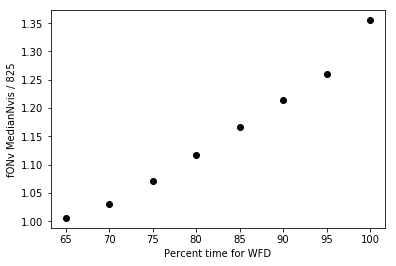

In [26]:
plt.plot(fracs, data_array['fONv MedianNvis'][indices]/825., 'ko')
plt.xlabel('Percent time for WFD')
plt.ylabel('fONv MedianNvis / 825')


[array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([8])]